In [1]:
from get_dataset import * 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, layers
import seaborn as sns
import os

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-20 16:12:33.211877: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
MODELS_FOLDER = "saved_models"
if not os.path.exists(MODELS_FOLDER):
    os.mkdir(MODELS_FOLDER)

In [4]:
ds_train = get_dataset("train").batch(64)
ds_test = get_dataset("test").batch(64)

2023-04-20 16:15:40.538512: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7325 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


In [14]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=MODELS_FOLDER+"/my_model",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [29]:
model = models.Sequential([
    layers.Input(shape=[124, 129]),
    layers.Bidirectional(layers.SimpleRNN(64)),
    layers.Dense(12)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_11 (Bidirecti  (None, 128)              24832     
 onal)                                                           
                                                                 
 dense_13 (Dense)            (None, 12)                1548      
                                                                 
Total params: 26,380
Trainable params: 26,380
Non-trainable params: 0
_________________________________________________________________


In [30]:
EPOCHS = 30
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=3),
)

Epoch 1/30
348/348 [==============================] - 20s 53ms/step - loss: 2.1480 - accuracy: 0.2351 - val_loss: 2.2294 - val_accuracy: 0.2301
Epoch 2/30
348/348 [==============================] - 19s 51ms/step - loss: 2.0394 - accuracy: 0.2843 - val_loss: 2.2267 - val_accuracy: 0.2337
Epoch 3/30
348/348 [==============================] - 18s 51ms/step - loss: 2.0837 - accuracy: 0.2655 - val_loss: 2.1962 - val_accuracy: 0.2525
Epoch 4/30
348/348 [==============================] - 18s 52ms/step - loss: 2.0368 - accuracy: 0.2893 - val_loss: 2.2008 - val_accuracy: 0.2434
Epoch 5/30
348/348 [==============================] - 18s 52ms/step - loss: 2.0319 - accuracy: 0.2932 - val_loss: 2.1964 - val_accuracy: 0.2451
Epoch 6/30
348/348 [==============================] - 19s 51ms/step - loss: 2.0366 - accuracy: 0.2876 - val_loss: 2.1963 - val_accuracy: 0.2519
Epoch 6: early stopping


In [16]:
model = models.Sequential([
    layers.Input(shape=[124, 129]),
    layers.Bidirectional(layers.LSTM(128)),
    layers.Dense(12)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 256)              264192    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 12)                3084      
                                                                 
Total params: 267,276
Trainable params: 267,276
Non-trainable params: 0
_________________________________________________________________


2023-04-20 16:20:54.120330: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-20 16:20:54.121514: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-20 16:20:54.122257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [47]:
EPOCHS = 30
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=EPOCHS,
    callbacks=[tf.keras.callbacks.EarlyStopping(verbose=1, patience=3), model_checkpoint_callback],
)

Epoch 1/30
348/348 [==============================] - 6s 12ms/step - loss: 0.1054 - accuracy: 0.9656 - val_loss: 0.5094 - val_accuracy: 0.8692
Epoch 2/30
348/348 [==============================] - 4s 10ms/step - loss: 0.1078 - accuracy: 0.9640 - val_loss: 0.4816 - val_accuracy: 0.8741
Epoch 3/30
348/348 [==============================] - 5s 10ms/step - loss: 0.0955 - accuracy: 0.9687 - val_loss: 0.4954 - val_accuracy: 0.8776
Epoch 4/30
348/348 [==============================] - 4s 10ms/step - loss: 0.0981 - accuracy: 0.9681 - val_loss: 0.5283 - val_accuracy: 0.8637
Epoch 5/30
348/348 [==============================] - 4s 10ms/step - loss: 0.0922 - accuracy: 0.9707 - val_loss: 0.5249 - val_accuracy: 0.8679
Epoch 5: early stopping


In [47]:
model = models.Sequential([
    layers.Input(shape=[124, 129]),
    layers.Bidirectional(layers.GRU(128)),
    layers.Dense(12)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_22 (Bidirecti  (None, 256)              198912    
 onal)                                                           
                                                                 
 dense_22 (Dense)            (None, 12)                3084      
                                                                 
Total params: 201,996
Trainable params: 201,996
Non-trainable params: 0
_________________________________________________________________


2023-04-20 10:42:48.513108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-20 10:42:48.514162: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-20 10:42:48.514890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [60]:
EPOCHS = 30
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=3),
)

Epoch 1/30
348/348 [==============================] - 4s 10ms/step - loss: 0.0887 - accuracy: 0.9714 - val_loss: 0.5361 - val_accuracy: 0.8711
Epoch 2/30
114/348 [========>.....................] - ETA: 2s - loss: 0.0962 - accuracy: 0.9667

KeyboardInterrupt: 

49/49 [==============================] - 0s 6ms/step


2023-04-20 16:25:28.727442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


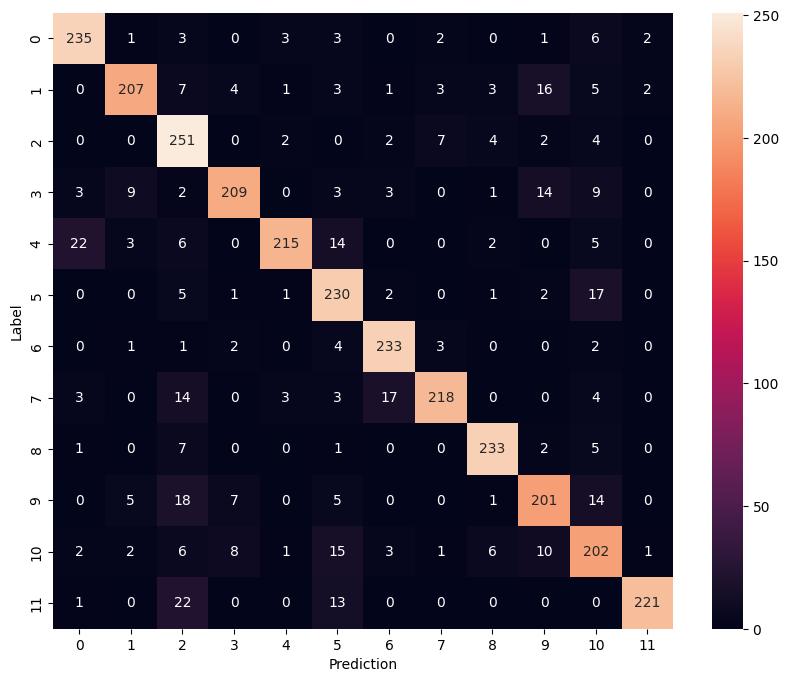

In [22]:
y_pred = model.predict(ds_test)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(ds_test.map(lambda s,lab: lab)), axis=0)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()


In [21]:
model.evaluate(ds_test)

49/49 [==============================] - 0s 5ms/step - loss: 0.5064 - accuracy: 0.8617


[0.5063550472259521, 0.8617331981658936]

In [20]:
model.load_weights(MODELS_FOLDER+"/my_model")

In [61]:
model.history.history

{'loss': [0.08874228596687317],
 'accuracy': [0.971435010433197],
 'val_loss': [0.5360872745513916],
 'val_accuracy': [0.8711457252502441]}

In [62]:
import json
#os.remove("dict.json")
f = open("dict.json","w")
json.dump(model.history.history, f)
f.close()